<div style = "text-align:center">

# EDA Com pandas
</div>



In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis



# Análise Descritiva 

In [3]:
# Carregar o dataset
df = pd.read_csv("carros_usados.csv", sep=';')

# Verificar o número de linhas e colunas
print("Número de linhas e colunas:", df.shape , "\n")

pd.DataFrame(df)

Número de linhas e colunas: (7495, 13) 



,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,SIX,WHITE,DODGE,AZ,DODGE.NEON
2,TRAIN,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,SEVEN+,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,TRAIN,4636,100,YES,58519,ECONOMY,Import,4,FOUR,GOLD,KIA,NV,KIA.SEPHIA
4,TRAIN,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,FOUR,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7490,TRAIN,4625,37,NO,67131,FAMILY.MEDIUM,Domestic,5,FIVE,RED,BUICK,TX,BUICK.SKYLARK
7491,TEST,4024,37,NO,77425,LUXURY,Domestic,9,SEVEN+,GOLD,OTHER,TX,LINCOLN.TOWN CAR
7492,TRAIN,4910,33,NO,61011,LUXURY,Import,5,FIVE,BLUE,NISSAN,TX,NISSAN.ALTIMA
7493,TEST,4669,3,NO,81518,LUXURY,Import,6,SIX,WHITE,NISSAN,VA,NISSAN.ALTIMA


# Infomrações gerais sobre o dataset


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7495 entries, 0 to 7494
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   data.set           7495 non-null   object
 1   total.cost         7495 non-null   int64 
 2   lot.sale.days      7495 non-null   int64 
 3   overage            7495 non-null   object
 4   mileage            7495 non-null   int64 
 5   vehicle.type       7495 non-null   object
 6   domestic.import    7495 non-null   object
 7   vehicle.age        7495 non-null   int64 
 8   vehicle.age.group  7495 non-null   object
 9   color.set          7495 non-null   object
 10  makex              7495 non-null   object
 11  state              7495 non-null   object
 12  make.model         7495 non-null   object
dtypes: int64(4), object(9)
memory usage: 761.3+ KB


In [4]:
#Verifica a quantidade de valores únicos por coluna 
df.nunique()

data.set                3
total.cost           3129
lot.sale.days         287
overage                 2
mileage              7019
vehicle.type            5
domestic.import         2
vehicle.age            12
vehicle.age.group       5
color.set               8
makex                  20
state                   8
make.model             95
dtype: int64

In [5]:
type(df)

pandas.core.frame.DataFrame

# Estátisticas Descritivas

### Medias de Tendência Central

In [24]:
# Medidas de Tendência Central
print("\nMedias de Tendência Central:\n")
colunas = ['total.cost', 'lot.sale.days', 'mileage', 'vehicle.age']

for coluna in colunas:
    print(f"{coluna}:")
    print(f"  Média: {df[coluna].mean()}")
    print(f"  Mediana: {df[coluna].median()}")
    print(f"  Moda: {df[coluna].mode()[0]}")
    print()




Medias de Tendência Central:

total.cost:
  Média: 4980.035490326884
  Mediana: 4919.0
  Moda: 4836

lot.sale.days:
  Média: 76.45430286857905
  Mediana: 73.0
  Moda: 1

mileage:
  Média: 77234.53342228151
  Mediana: 78534.0
  Moda: 78518

vehicle.age:
  Média: 5.567311541027352
  Mediana: 5.0
  Moda: 5



### Medidas de Dispersão

In [17]:
colunas = ['total.cost', 'lot.sale.days', 'mileage', 'vehicle.age']

for coluna in colunas:
    print(f"\n{coluna.upper()}:")
    print("Desvio padrão:", df[coluna].std())
    print("Variância:", df[coluna].var())
    print("Amplitude:", df[coluna].max() - df[coluna].min())



TOTAL.COST:
Desvio padrão: 937.6020638729166
Variância: 879097.6301787527
Amplitude: 8438

LOT.SALE.DAYS:
Desvio padrão: 64.64433714893109
Variância: 4178.890325424672
Amplitude: 300

MILEAGE:
Desvio padrão: 17142.552587689337
Variância: 293867109.2216944
Amplitude: 118214

VEHICLE.AGE:
Desvio padrão: 1.7562193168008726
Variância: 3.0843062887045236
Amplitude: 11


### Medidas de Forma

#### Assimetria


In [31]:
colunas = ['total.cost', 'lot.sale.days', 'mileage', 'vehicle.age']

for coluna in colunas:
    print(f"{coluna.upper()}:")
    print("  Assimetria (Skewness):", skew(df[coluna]))
    print()

TOTAL.COST:
  Assimetria (Skewness): 0.32256349578644494

LOT.SALE.DAYS:
  Assimetria (Skewness): 0.6471620883828185

MILEAGE:
  Assimetria (Skewness): -0.8363248320670525

VEHICLE.AGE:
  Assimetria (Skewness): 0.18214663452552474



#### Curtose


In [32]:
colunas = ['total.cost', 'lot.sale.days', 'mileage', 'vehicle.age']

for coluna in colunas:
    print(f"{coluna.upper()}:")
    print("  Curtose (Kurtosis):", kurtosis(df[coluna]))
    print()

TOTAL.COST:
  Curtose (Kurtosis): 0.9079353130086685

LOT.SALE.DAYS:
  Curtose (Kurtosis): -0.17850271090112146

MILEAGE:
  Curtose (Kurtosis): 1.4267390962663224

VEHICLE.AGE:
  Curtose (Kurtosis): -0.08910153554001088



### Quartis, IQR e Detecção de Outliers


In [16]:
for coluna in colunas:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

    print(f'\n{coluna.upper()}')
    print(f'Q1: {Q1}')
    print(f'Q3: {Q3}')
    print(f'IQR: {IQR}')
    print(f'\nOutliers encontrados: {len(outliers)}')



TOTAL.COST
Q1: 4354.0
Q3: 5540.0
IQR: 1186.0

Outliers encontrados: 146

LOT.SALE.DAYS
Q1: 14.0
Q3: 120.0
IQR: 106.0

Outliers encontrados: 33

MILEAGE
Q1: 67946.0
Q3: 89340.0
IQR: 21394.0

Outliers encontrados: 177

VEHICLE.AGE
Q1: 4.0
Q3: 7.0
IQR: 3.0

Outliers encontrados: 3


### Visualizações

#### Histograma

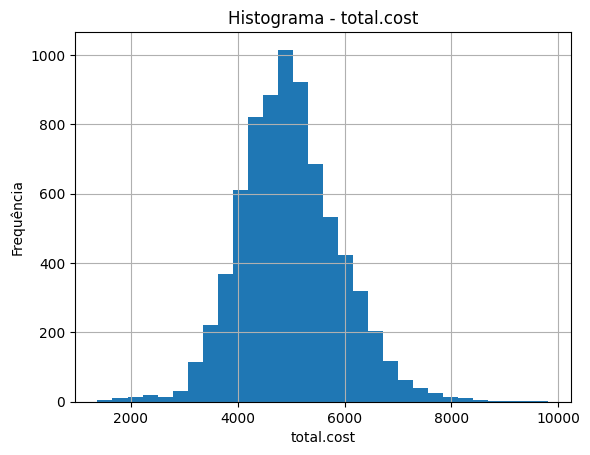

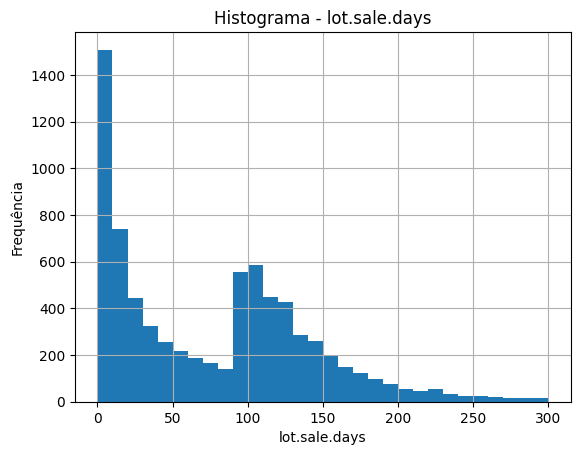

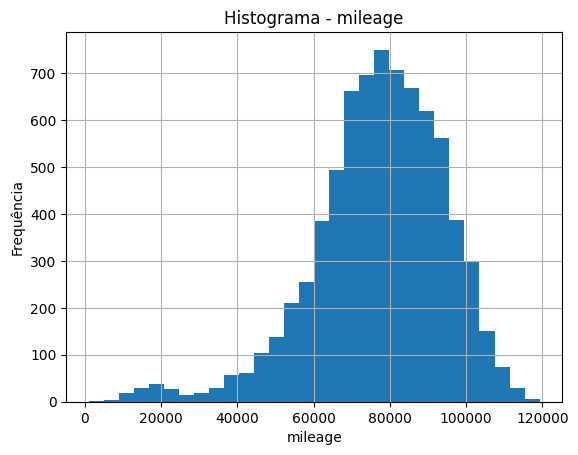

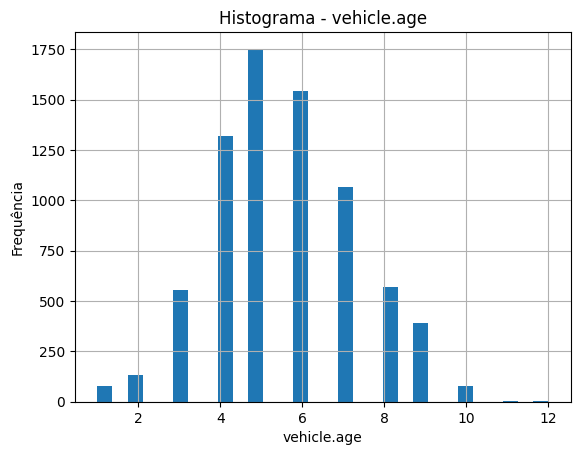

In [13]:
for coluna in colunas:
    df[coluna].hist(bins=30)
    plt.title(f'Histograma - {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()


#### Gráfico de Dispersão(ScatterPlot)

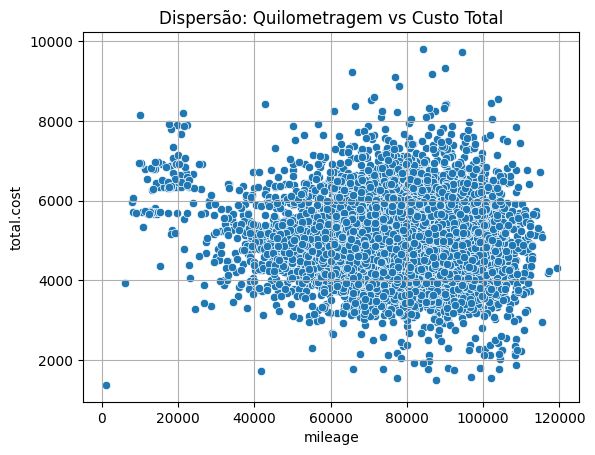

In [14]:
sns.scatterplot(x='mileage', y='total.cost', data=df)
plt.title('Dispersão: Quilometragem vs Custo Total')
plt.grid(True)
plt.show()


#### Boxplot


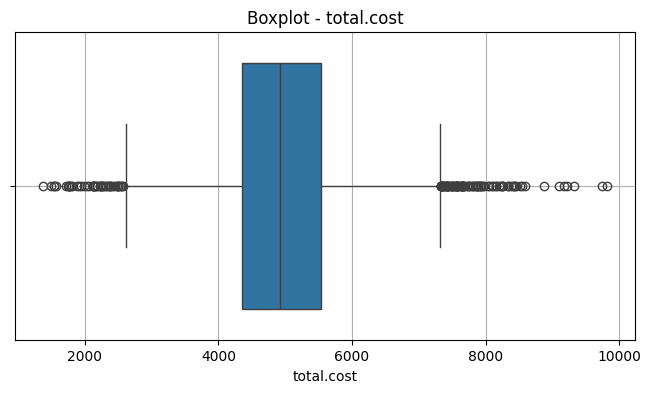

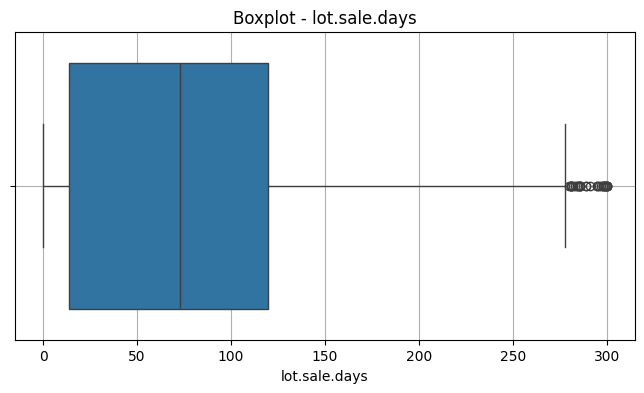

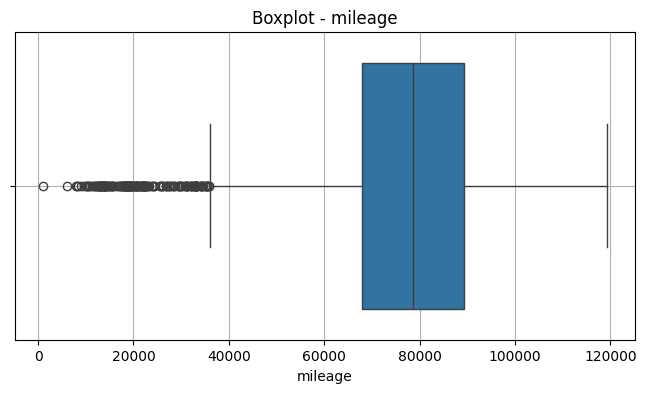

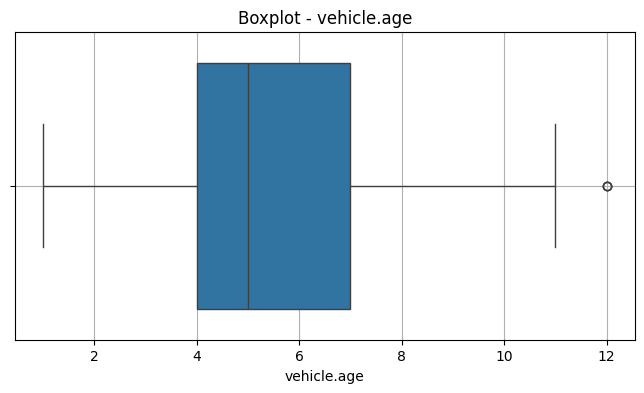

In [10]:
# Boxplots individuais para cada coluna
for coluna in colunas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[coluna])
    plt.title(f"Boxplot - {coluna}")
    plt.xlabel(coluna)
    plt.grid(True)
    plt.show()

### Matriz de Correlação


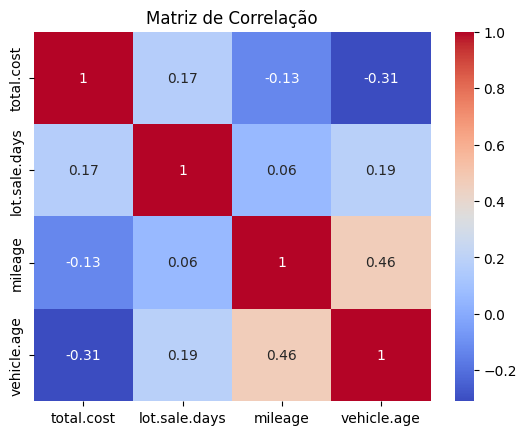

In [ ]:
# Gera um mapa de calor (heatmap) da matriz de correlação entre as variáveis numéricas selecionadas,
#  'annot=True' exibe os valores das correlações nas células,
# 'cmap="coolwarm"' define a paleta de cores para destacar correlações positivas e negativas.
sns.heatmap(df[colunas].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()
